特許データのクロス集計


In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/patent4')

データフレームの作成


In [ ]:
import pandas as pd
# googleドライブの利用
#from google.colab import drive
#drive.mount('/content/drive')
# データの前処理
# データの読み込み(google ドライブから)
df_drone_data_0 = pd.read_csv("/content/drive/MyDrive/patent4/J-PlatPat2015.csv")
df_drone_data_1 = pd.read_csv("/content/drive/MyDrive/patent4/J-PlatPat2016.csv")
df_drone_data_2 = pd.read_csv("/content/drive/MyDrive/patent4/J-PlatPat2017.csv")
df_drone_data_3 = pd.read_csv("/content/drive/MyDrive/patent4/J-PlatPat2018.csv")
df_drone_data_4 = pd.read_csv("/content/drive/MyDrive/patent4/J-PlatPat2019.csv")
df_drone_data_5 = pd.read_csv("/content/drive/MyDrive/patent4/J-PlatPat2020.csv")
df_drone_data_6 = pd.read_csv("/content/drive/MyDrive/patent4/J-PlatPat2021.csv")
df_drone_data_7 = pd.read_csv("/content/drive/MyDrive/patent4/J-PlatPat2022.csv")
df_drone_data_8 = pd.read_csv("/content/drive/MyDrive/patent4/J-PlatPat2023.csv")
df_drone_data_9 = pd.read_csv("/content/drive/MyDrive/patent4/J-PlatPat2024.csv")
#df_drone_data_2 = pd.read_csv("/content/drive/MyDrive/pat_data_drone.20190101.csv", encoding = "shift-jis")
# データフレームの結合（縦方向）
df_drone_data = pd.concat([df_drone_data_0, df_drone_data_1, df_drone_data_2, df_drone_data_3, df_drone_data_4, df_drone_data_5, df_drone_data_6, df_drone_data_7, df_drone_data_8, df_drone_data_9], ignore_index = True)
#必要な列のみ抽出
df_drone_data = df_drone_data[['出願人/権利者', 'FI']]
#不要語の削除（出願人/権利者）
df_drone_data['出願人/権利者'] = df_drone_data['出願人/権利者'].str.replace('▲', '')
df_drone_data['出願人/権利者'] = df_drone_data['出願人/権利者'].str.replace('▼', '')
# 欠落データを削除
df_drone_data = df_drone_data.dropna(axis=0)
# データフレームの確認
print(df_drone_data)

                               出願人/権利者  \
0                             株式会社レグシス   
1                              株式会社ＪＯＮ   
2                            株式会社カタルシス   
3                     三井不動産レジデンシャル株式会社   
4                     三井不動産レジデンシャル株式会社   
..                                 ...   
909                   Ｓｅｃｕｒｉｔｉｚｅ２４合同会社   
910                          株式会社オービック   
911  プロパー　ピーティーイー　リミテッド              他   
912                 株式会社ドッドウエルビー・エム・エス   
913                         株式会社Ｆａｃｉｌｏ   

                                            FI  
0        ,G06Q50/16,G06Q20/24,G06Q30/02,140,他,  
1                        ,G06Q50/16,G06Q50/26,  
2    ,G06Q30/06,130,G06Q50/16,G06Q30/06,300,他,  
3        ,A47B81/00@E,A47B87/00,A47B97/00@J,他,  
4                 ,A47B81/00@E,E04B2/74,541@C,  
..                                         ...  
909                     G06Q50/16G06Q20/38,310  
910                    G06Q50/16,300G06Q50/163  
911                                  G06Q50/16  
912  

In [ ]:
# CSV出力
df_drone_data.to_csv('result1.csv', index=True, encoding='utf-8')

In [ ]:
#df_drone_data.to_csv('result10.csv', columns=['出願人/権利者', 'FI'])

エクスプロード処理

In [ ]:
# 'FI' を分割
df_drone_data['FI'] = df_drone_data['FI'].str.split(',')
# '出願人/権利者'を分割
df_drone_data['出願人/権利者'] = df_drone_data['出願人/権利者'].str.split(',')
# エクスプロード
df_drone_data = df_drone_data.explode('FI').explode('出願人/権利者')
# インデックスのリセット
df_drone_data = df_drone_data.reset_index(drop=True)

# 欠落データを削除?
#df_drone_data = df_drone_data.dropna(how='any')
df_drone_data = df_drone_data.replace(' ', None)
df_drone_data = df_drone_data.replace('　', None)
df_drone_data = df_drone_data.replace('', None)
df_drone_data = df_drone_data.dropna(subset=['FI'])
df_drone_data = df_drone_data.dropna(subset=['出願人/権利者'])
##
# エクスプロード処理の確認
print(df_drone_data)
# CSV出力
df_drone_data.to_csv('result2.csv', index=True, encoding='utf-8')

                                出願人/権利者             FI
1                              株式会社レグシス      G06Q50/16
2                              株式会社レグシス      G06Q20/24
3                              株式会社レグシス      G06Q30/02
4                              株式会社レグシス            140
5                              株式会社レグシス              他
...                                 ...            ...
1801                          株式会社オービック      G06Q50/16
1802                          株式会社オービック  300G06Q50/163
1803  プロパー　ピーティーイー　リミテッド              他      G06Q50/16
1804                 株式会社ドッドウエルビー・エム・エス    E05B19/00@E
1805                         株式会社Ｆａｃｉｌｏ      G06Q50/16

[1712 rows x 2 columns]


クロス集計

In [ ]:
# クロス集計
result1 = pd.crosstab(df_drone_data['出願人/権利者'],df_drone_data['FI'])
print(result1)

FI                                           030G06T1/00  060他  100  \
出願人/権利者                                                               
ちょう　永　善              他                                 0     0    0   
ほっと保証株式会社                                              0     0    0   
アイ・シンクレント株式会社                                          0     0    0   
アクセンチュア　グローバル　ソリューションズ　リミテッド              他            0     0    0   
アズビル株式会社              他                                0     0    0   
...                                                  ...   ...  ...   
Ｓｅｃｕｒｉｔｉｚｅ２４合同会社                                       0     0    0   
Ｓｔｕｄｉｏ　ＬＯＣ合同会社                                         0     0    0   
ＷｅａｌｔｈＰａｒｋ株式会社                                         0     0    0   
ｂｏｏｏｓｔ　ｔｅｃｈｎｏｌｏｇｉｅｓ株式会社                                0     0    0   
ｅ不動産株式会社                                               0     0    0   

FI                                           100G06F13/00  \
出願人/権利者        

In [ ]:
# CSV出力
result1.to_csv('result3.csv', index=True, encoding='utf-8')

top20に限定したクロス集計表の作成

In [ ]:
# FIのカウント
fi_counts = df_drone_data['FI'].value_counts()
# FIをtop10で並べ替え
top_fi = fi_counts.sort_values(ascending=False).index[:20].tolist()
# 出願人/権利者のカウント
person_counts = df_drone_data['出願人/権利者'].value_counts()
# 出願人/権利者をtop10で並べ替え
top_person = person_counts.sort_values(ascending=False).index[:20].tolist()
# top10の FIと出願人でクロス集計
result2 = pd.crosstab(df_drone_data[df_drone_data['出願人/権利者'].isin(top_person)]['出願人/権利者'], df_drone_data[df_drone_data['FI'].isin(top_fi)]['FI'])
print(result2)
# CSV出力
result2.to_csv('result4.csv', index=True, encoding='utf-8')

FI                  300  300G06Q50/163  300他  320  G06F13/00  G06F17/30  \
出願人/権利者                                                                   
ソニー株式会社               0              0     0    0          0          0   
パナソニックＩＰマネジメント株式会社    0              0     0    0          0          4   
ヤフー株式会社               0              0     1    1          3          2   
嘉陽　美幸                 0              0     0    0          0          0   
富士通株式会社               0              1     0    0          0          4   
株式会社オーガスタス            0              0     0    0          0          0   
株式会社オービック             0             10     0    2          0          0   
株式会社パークランド            0              0     0    0          0          0   
株式会社ボルテックス            0              1     0    0          0          0   
株式会社リコー               0              0     1    0          3          0   
株式会社創建                0              0     0    0          0          1   
株式会社ＪＯＮ               0  

Pythonでバブルチャートを書いてみる
@ip_design(Kawakami Naritoshi)
最終更新日 2023年02月13日
投稿日 2023年02月13日
https://qiita.com/ip_design/items/fc54eaf3e36bd50f12bb


データの前処理

---



In [ ]:
! pip install japanize-matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import japanize_matplotlib
# googleドライブの利用
#from google.colab import drive
#drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 21.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=1d22b2605340d35049d98efe3e124a91b2b06f5eb443c13bf88be1c1822679d7
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [ ]:
# データの前処理
# データの読み込み(google ドライブから)
df_drone_data_0 = pd.read_csv("/content/drive/MyDrive/patent4/J-PlatPat2015.csv")
df_drone_data_1 = pd.read_csv("/content/drive/MyDrive/patent4/J-PlatPat2016.csv")
df_drone_data_2 = pd.read_csv("/content/drive/MyDrive/patent4/J-PlatPat2017.csv")
df_drone_data_3 = pd.read_csv("/content/drive/MyDrive/patent4/J-PlatPat2018.csv")
df_drone_data_4 = pd.read_csv("/content/drive/MyDrive/patent4/J-PlatPat2019.csv")
df_drone_data_5 = pd.read_csv("/content/drive/MyDrive/patent4/J-PlatPat2020.csv")
df_drone_data_6 = pd.read_csv("/content/drive/MyDrive/patent4/J-PlatPat2021.csv")
df_drone_data_7 = pd.read_csv("/content/drive/MyDrive/patent4/J-PlatPat2022.csv")
df_drone_data_8 = pd.read_csv("/content/drive/MyDrive/patent4/J-PlatPat2023.csv")
df_drone_data_9 = pd.read_csv("/content/drive/MyDrive/patent4/J-PlatPat2024.csv")
#df_drone_data = pd.read_csv("/content/drive/MyDrive/patent2/特実_国内文献.csv")
#df_drone_data_2 = pd.read_csv("/content/drive/MyDrive/pat_data_drone.20190101.csv", encoding = "shift-jis")
# データフレームの結合（縦方向）
#df_drone_data = pd.concat([df_drone_data_1, df_drone_data_2], ignore_index = True)
df_drone_data = pd.concat([df_drone_data_0, df_drone_data_1, df_drone_data_2, df_drone_data_3, df_drone_data_4, df_drone_data_5, df_drone_data_6, df_drone_data_7, df_drone_data_8, df_drone_data_9], ignore_index = True)
#必要な列のみ抽出
df_drone_data = df_drone_data[['出願人/権利者', 'FI']]
#不要語の削除（出願人/権利者）
df_drone_data['出願人/権利者'] = df_drone_data['出願人/権利者'].str.replace('▲', '')
df_drone_data['出願人/権利者'] = df_drone_data['出願人/権利者'].str.replace('▼', '')
# 欠落データを削除
df_drone_data = df_drone_data.dropna(axis=0)

# エクスプロード処理の確認
print(df_drone_data)
# CSV出力
df_drone_data.to_csv('result5.csv', index=True, encoding='utf-8')


                               出願人/権利者  \
0                             株式会社レグシス   
1                              株式会社ＪＯＮ   
2                            株式会社カタルシス   
3                     三井不動産レジデンシャル株式会社   
4                     三井不動産レジデンシャル株式会社   
..                                 ...   
909                   Ｓｅｃｕｒｉｔｉｚｅ２４合同会社   
910                          株式会社オービック   
911  プロパー　ピーティーイー　リミテッド              他   
912                 株式会社ドッドウエルビー・エム・エス   
913                         株式会社Ｆａｃｉｌｏ   

                                            FI  
0        ,G06Q50/16,G06Q20/24,G06Q30/02,140,他,  
1                        ,G06Q50/16,G06Q50/26,  
2    ,G06Q30/06,130,G06Q50/16,G06Q30/06,300,他,  
3        ,A47B81/00@E,A47B87/00,A47B97/00@J,他,  
4                 ,A47B81/00@E,E04B2/74,541@C,  
..                                         ...  
909                     G06Q50/16G06Q20/38,310  
910                    G06Q50/16,300G06Q50/163  
911                                  G06Q50/16  
912  

エクスプロード処理

In [ ]:
# 'FI' を分割
df_drone_data['FI'] = df_drone_data['FI'].str.split(',')
# '出願人/権利者'を分割
df_drone_data['出願人/権利者'] = df_drone_data['出願人/権利者'].str.split(',')
# エクスプロード
df_drone_data = df_drone_data.explode('FI').explode('出願人/権利者')
# インデックスのリセット
df_drone_data = df_drone_data.reset_index(drop=True)

# 欠落データを削除?
#df_drone_data = df_drone_data.dropna(how='any')
df_drone_data = df_drone_data.replace(' ', None)
df_drone_data = df_drone_data.replace('　', None)
df_drone_data = df_drone_data.replace('', None)
df_drone_data = df_drone_data.dropna(subset=['FI'])


In [ ]:
# FIのカウント
fi_counts = df_drone_data['FI'].value_counts()
# FIをtop20で並べ替え
top_fi = fi_counts.sort_values(ascending=False).index[:20].tolist()
# 出願人/権利者のカウント
person_counts = df_drone_data['出願人/権利者'].value_counts()
# 出願人/権利者をtop20で並べ替え
top_person = person_counts.sort_values(ascending=False).index[:20].tolist()
# データフレームdf_drone_dataから「出願人/権利者」列と「FI」列をtop20のみ含むようにフィルタリング
df_drone_data['出願人/権利者'] =df_drone_data [df_drone_data['出願人/権利者'].isin(top_person)]['出願人/権利者']
df_drone_data['FI'] =df_drone_data[df_drone_data['FI'].isin(top_fi)]['FI']

print(result2)
# CSV出力
result2.to_csv('result6.csv', index=True, encoding='utf-8')

FI                  300  300G06Q50/163  300他  320  G06F13/00  G06F17/30  \
出願人/権利者                                                                   
ソニー株式会社               0              0     0    0          0          0   
パナソニックＩＰマネジメント株式会社    0              0     0    0          0          4   
ヤフー株式会社               0              0     1    1          3          2   
嘉陽　美幸                 0              0     0    0          0          0   
富士通株式会社               0              1     0    0          0          4   
株式会社オーガスタス            0              0     0    0          0          0   
株式会社オービック             0             10     0    2          0          0   
株式会社パークランド            0              0     0    0          0          0   
株式会社ボルテックス            0              1     0    0          0          0   
株式会社リコー               0              0     1    0          3          0   
株式会社創建                0              0     0    0          0          1   
株式会社ＪＯＮ               0  

groupby処理
「出願人/権利者」と「FI」の列でグループ化し、グループ内の要素数を数えます。

In [ ]:
#groupby処理
# 「出願人/権利者」と「FI」の列でグループ化し、グループ内の要素数を数える
result = df_drone_data.groupby(['出願人/権利者', 'FI']).size().reset_index(name='Counts')
# 処理の確認
print(result)

               出願人/権利者                  FI  Counts
0              ソニー株式会社           G06Q50/16       5
1              ソニー株式会社  G06Q50/16G06Q30/02       1
2   パナソニックＩＰマネジメント株式会社           G06F17/30       4
3   パナソニックＩＰマネジメント株式会社           G06Q30/02       2
4              ヤフー株式会社                300他       1
..                 ...                 ...     ...
68        ＳＢＩモーゲージ株式会社                 300       1
69        ＳＢＩモーゲージ株式会社           G06Q30/06       1
70        ＳＢＩモーゲージ株式会社           G06Q40/02       5
71        ＳＢＩモーゲージ株式会社           G06Q50/16       2
72        ＳＢＩモーゲージ株式会社                   他       2

[73 rows x 3 columns]


In [ ]:
# CSV出力
result.to_csv('result7.csv', index=True, encoding='utf-8')

散布図作成
散布図をmatplotlibで描画します。バブルの大きさのみでは差異がわかりにくいと思いましたので、バブルごとにカウント数を表示する処理も行いました。

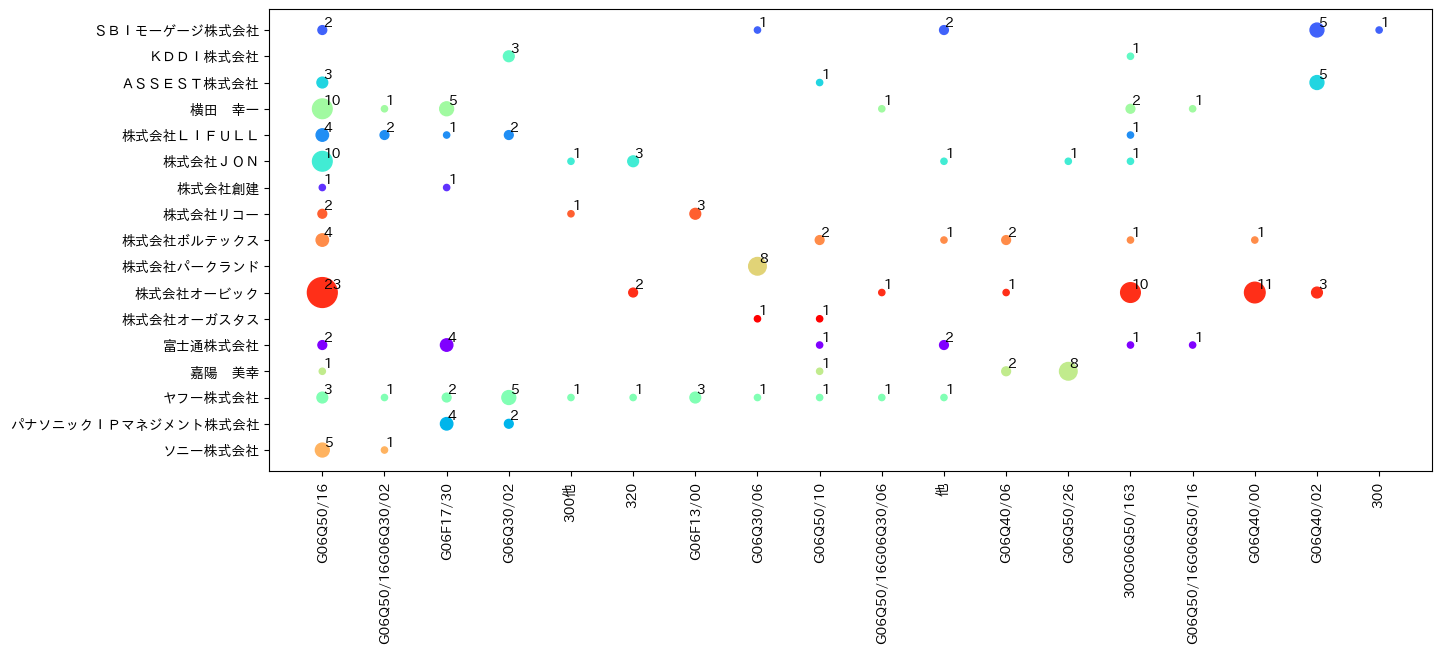

In [ ]:
# 「出願人/権利者」と「FI」の列からなる値をリスト形式に変換
x = result['FI'].tolist()
y = result['出願人/権利者'].tolist()
# 「Counts」列からなる値を元に、散布図のすべての点の大きさを示すリストを作成
sizes = [size * 20 for size in result['Counts'].tolist()]
# 「Counts」列からなる値を元に、散布図のすべての点のカウント数を示すリストを作成
nums = [num for num in result['Counts'].tolist()]
# 「出願人/権利者」列からなる値を元に、カテゴリーのリストを作成
categories = list(set(y))
# 色マップを作成
colors = cm.rainbow(np.linspace(0, 1, len(categories)))
colors = {categories[i]: colors[i] for i in range(len(categories))}
colors = [colors[item] for item in y]
# 散布図を作成
fig, ax = plt.subplots(figsize=(15.0, 6.0))
ax.scatter(x, y, s=sizes, c=colors)
# 散布図にカウント数を表示
for i, txt in enumerate(nums):
    ax.annotate(txt, (x[i], y[i]), textcoords="offset points", xytext=(1,1), ha='left', va='bottom')
# X軸項目を60°傾ける
plt.xticks(rotation=90)
# 図を表示
plt.savefig("Cross.png",dpi=150)   # プロットしたグラフをファイル.pngに保存する
plt.show()